# Waves Price

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/bitcoin/waves_price.csv')

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
456,"Jun 06, 2016",0.712541,1.17,0.712541,0.768672,"95,573",-
457,"Jun 05, 2016",0.587588,1.11,0.580745,0.713006,"41,700",-
458,"Jun 04, 2016",1.090000,1.29,0.575898,0.586993,"4,912",-
459,"Jun 03, 2016",1.290000,1.66,0.727579,1.090000,"57,721",-
460,"Jun 02, 2016",1.330000,1.39,1.150000,1.210000,"83,734",-


In [4]:
df.count()

Date          461
Open          461
High          461
Low           461
Close         461
Volume        461
Market Cap    461
dtype: int64

In [5]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There are missing data here and there are several data which have different format. Some of the data do not use number format

In [6]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
456,"Jun 06, 2016",0.712541,1.17,0.712541,0.768672,95573.0,NaN
457,"Jun 05, 2016",0.587588,1.11,0.580745,0.713006,41700.0,NaN
458,"Jun 04, 2016",1.090000,1.29,0.575898,0.586993,4912.0,NaN
459,"Jun 03, 2016",1.290000,1.66,0.727579,1.090000,57721.0,NaN
460,"Jun 02, 2016",1.330000,1.39,1.150000,1.210000,83734.0,NaN


In [8]:
df.count()

Date          461
Open          461
High          461
Low           461
Close         461
Volume        461
Market Cap    442
dtype: int64

Convert time column into date time format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
Date          461 non-null datetime64[ns]
Open          461 non-null float64
High          461 non-null float64
Low           461 non-null float64
Close         461 non-null float64
Volume        461 non-null float64
Market Cap    442 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.3 KB


In [11]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,19,0.041215


<function matplotlib.pyplot.show(*args, **kw)>

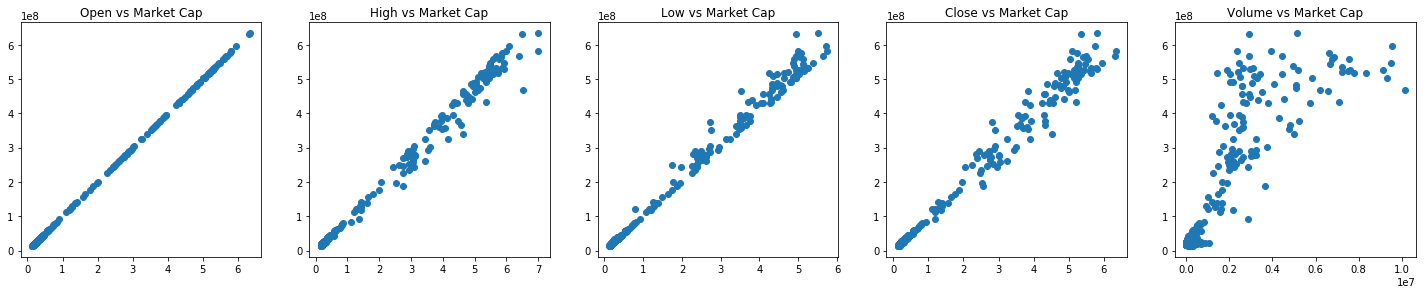

In [13]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Market Cap has linear condition with Open

from sklearn import linear_model

In [15]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:442]
Market_Cap = df['Market Cap'].iloc[0:442]

In [16]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.9999992512939394

In [18]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
456,2016-06-06,0.712541,1.17,0.712541,0.768672,95573.0,NaN,7.125777e+07
457,2016-06-05,0.587588,1.11,0.580745,0.713006,41700.0,NaN,5.876124e+07
458,2016-06-04,1.090000,1.29,0.575898,0.586993,4912.0,NaN,1.090074e+08
459,2016-06-03,1.290000,1.66,0.727579,1.090000,57721.0,NaN,1.290094e+08
460,2016-06-02,1.330000,1.39,1.150000,1.210000,83734.0,NaN,1.330097e+08


Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [19]:
df.count()

Date                  461
Open                  461
High                  461
Low                   461
Close                 461
Volume                461
Market Cap            442
Market Cap Predict    461
dtype: int64

The data is clean, no null value and has same format